# Analyze the predictor

In [42]:
import numpy as np
import pandas as pd
from covid_xprize.scoring.predictor_scoring import load_dataset
from covid_xprize.validation.scenario_generator import generate_scenario
from covid_xprize.examples.prescriptors.neat.utils import add_geo_id
from covid_xprize.nixtamalai import analyze_predictor
from covid_xprize.nixtamalai.analyze_predictor import IP_MAX_VALUES
from covid_xprize.nixtamalai.helpers import add_geo_id
from matplotlib import pylab as plt
from tqdm import tqdm

In [2]:
# Can set these longer for better evaluation. Will increase eval time
START_DATE = "2021-01-26"
END_DATE = "2021-02-24"

In [3]:
LATEST_DATA_URL = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
GEO_FILE = "countries_regions.csv"

latest_df = load_dataset(LATEST_DATA_URL, GEO_FILE)

In [4]:
IP_FILE = "prescriptions/robojudge_test_scenario.csv"
countries = None
scenario_df = generate_scenario(START_DATE, END_DATE, latest_df, countries, scenario="Freeze")

2021-01-27 06:13:06 numexpr.utils        INFO     Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-01-27 06:13:06 numexpr.utils        INFO     NumExpr defaulting to 8 threads.


In [37]:
res = []
for func in tqdm([lambda x: 0,
                  lambda x: IP_MAX_VALUES[x] if x == 'C1_School closing' else 0,
                  lambda x: IP_MAX_VALUES[x] if x == 'C2_Workplace closing' else 0,
                  lambda x: IP_MAX_VALUES[x] if x == 'C3_Cancel public events' else 0,
                  lambda x: IP_MAX_VALUES[x] if x == 'C4_Restrictions on gatherings' else 0,
                  lambda x: IP_MAX_VALUES[x] if x == 'C5_Close public transport' else 0,
                  lambda x: IP_MAX_VALUES[x] if x == 'C6_Stay at home requirements' else 0,
                  lambda x: IP_MAX_VALUES[x] if x == 'C7_Restrictions on internal movement' else 0,
                  lambda x: IP_MAX_VALUES[x] if x == 'C8_International travel controls' else 0,
                  lambda x: IP_MAX_VALUES[x] if x == 'H1_Public information campaigns' else 0,
                  lambda x: IP_MAX_VALUES[x] if x == 'H2_Testing policy' else 0,
                  lambda x: IP_MAX_VALUES[x] if x == 'H3_Contact tracing' else 0,
                  lambda x: IP_MAX_VALUES[x] if x == 'H6_Facial Coverings' else 0,
                  lambda x: IP_MAX_VALUES[x]]):
    _ = analyze_predictor.predict(START_DATE, END_DATE, scenario_df, prescription=func)
    add_geo_id(_)
    _.set_index("Date", inplace=True)
    _ = {k: v.PredictedDailyNewCases for k, v in _.groupby("GeoID")}
    res.append(pd.DataFrame(_))

100%|██████████| 14/14 [07:42<00:00, 33.04s/it]


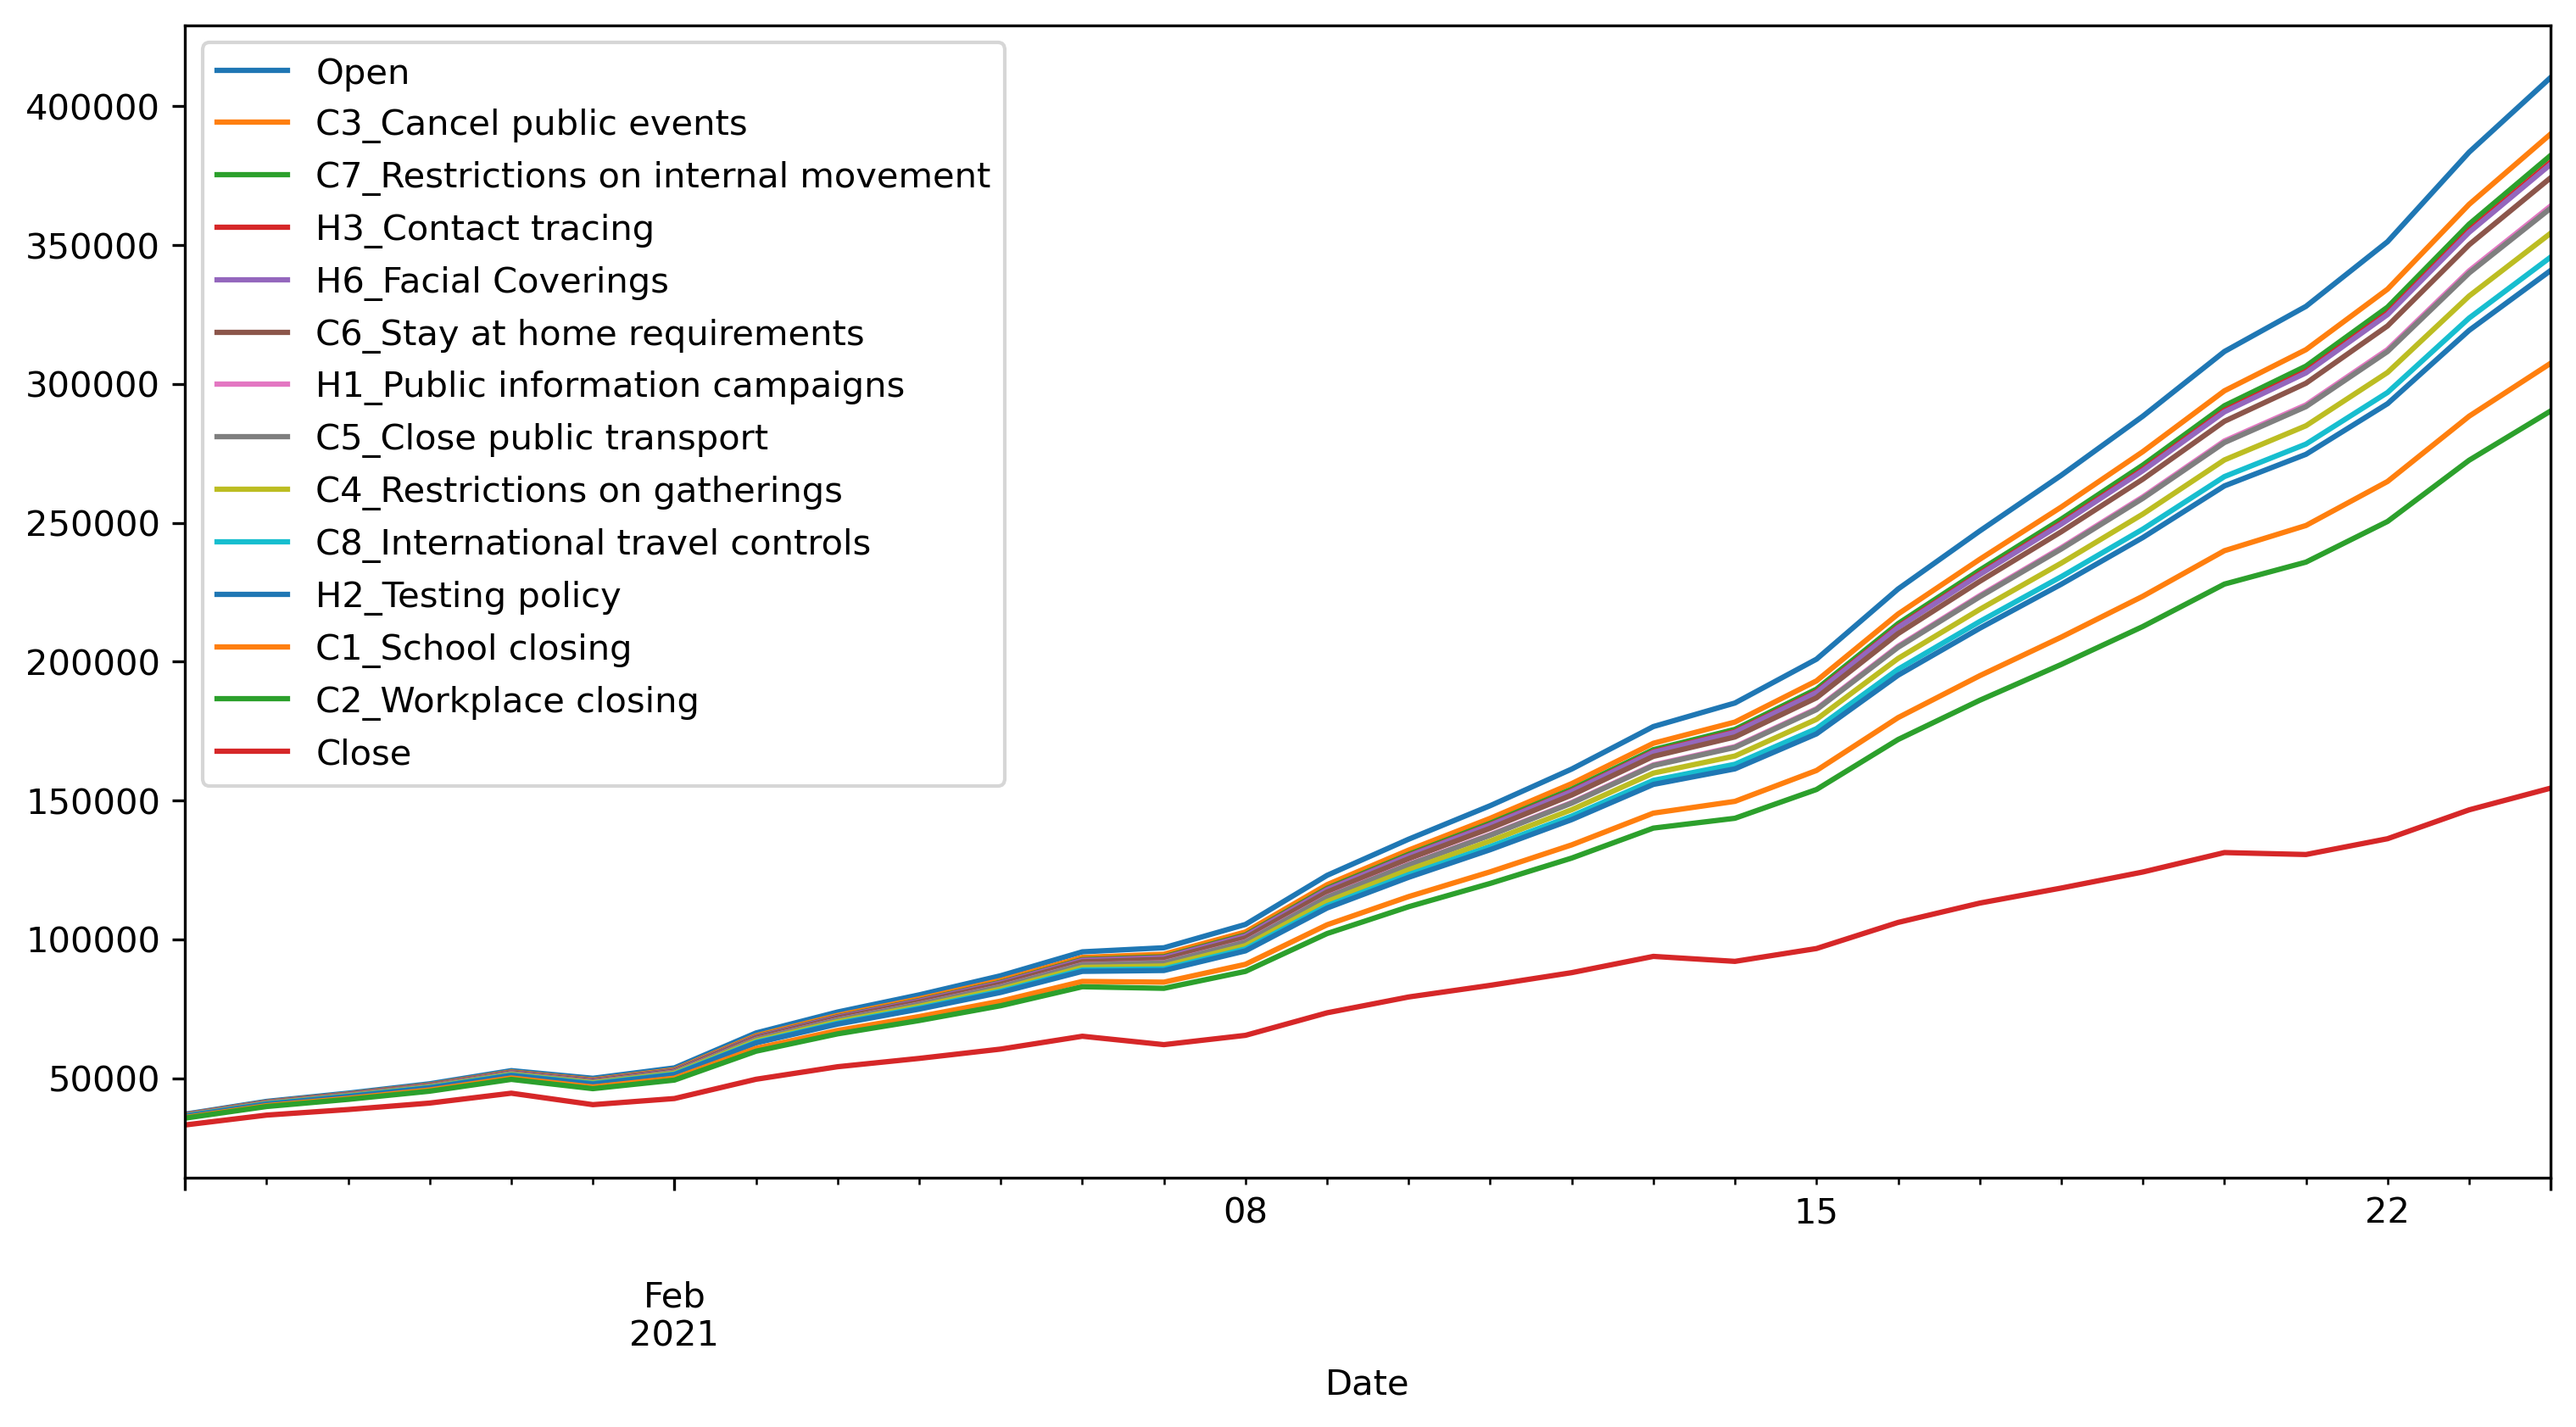

In [70]:
keys = list(IP_MAX_VALUES.keys())
keys.sort()
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
cnt = [x.Mexico.sum() for x in res]
for _, x in sorted(zip(cnt, res), reverse=True):
    x.Mexico.plot(ax=ax)
plt.legend([l for _, l in sorted(zip(cnt, ["Open"] + keys + ["Close"]), reverse=True)])
plt.savefig("mexico.png")

In [69]:
res2 = []
for func in tqdm([lambda x: 0,
                  lambda x: IP_MAX_VALUES[x] if x != 'C1_School closing' else 0,
                  lambda x: IP_MAX_VALUES[x] if x != 'C2_Workplace closing' else 0,
                  lambda x: IP_MAX_VALUES[x] if x != 'C3_Cancel public events' else 0,
                  lambda x: IP_MAX_VALUES[x] if x != 'C4_Restrictions on gatherings' else 0,
                  lambda x: IP_MAX_VALUES[x] if x != 'C5_Close public transport' else 0,
                  lambda x: IP_MAX_VALUES[x] if x != 'C6_Stay at home requirements' else 0,
                  lambda x: IP_MAX_VALUES[x] if x != 'C7_Restrictions on internal movement' else 0,
                  lambda x: IP_MAX_VALUES[x] if x != 'C8_International travel controls' else 0,
                  lambda x: IP_MAX_VALUES[x] if x != 'H1_Public information campaigns' else 0,
                  lambda x: IP_MAX_VALUES[x] if x != 'H2_Testing policy' else 0,
                  lambda x: IP_MAX_VALUES[x] if x != 'H3_Contact tracing' else 0,
                  lambda x: IP_MAX_VALUES[x] if x != 'H6_Facial Coverings' else 0,
                  lambda x: IP_MAX_VALUES[x]]):
    _ = analyze_predictor.predict(START_DATE, END_DATE, scenario_df, prescription=func)
    add_geo_id(_)
    _.set_index("Date", inplace=True)
    _ = {k: v.PredictedDailyNewCases for k, v in _.groupby("GeoID")}
    res2.append(pd.DataFrame(_))

100%|██████████| 14/14 [08:14<00:00, 35.29s/it]


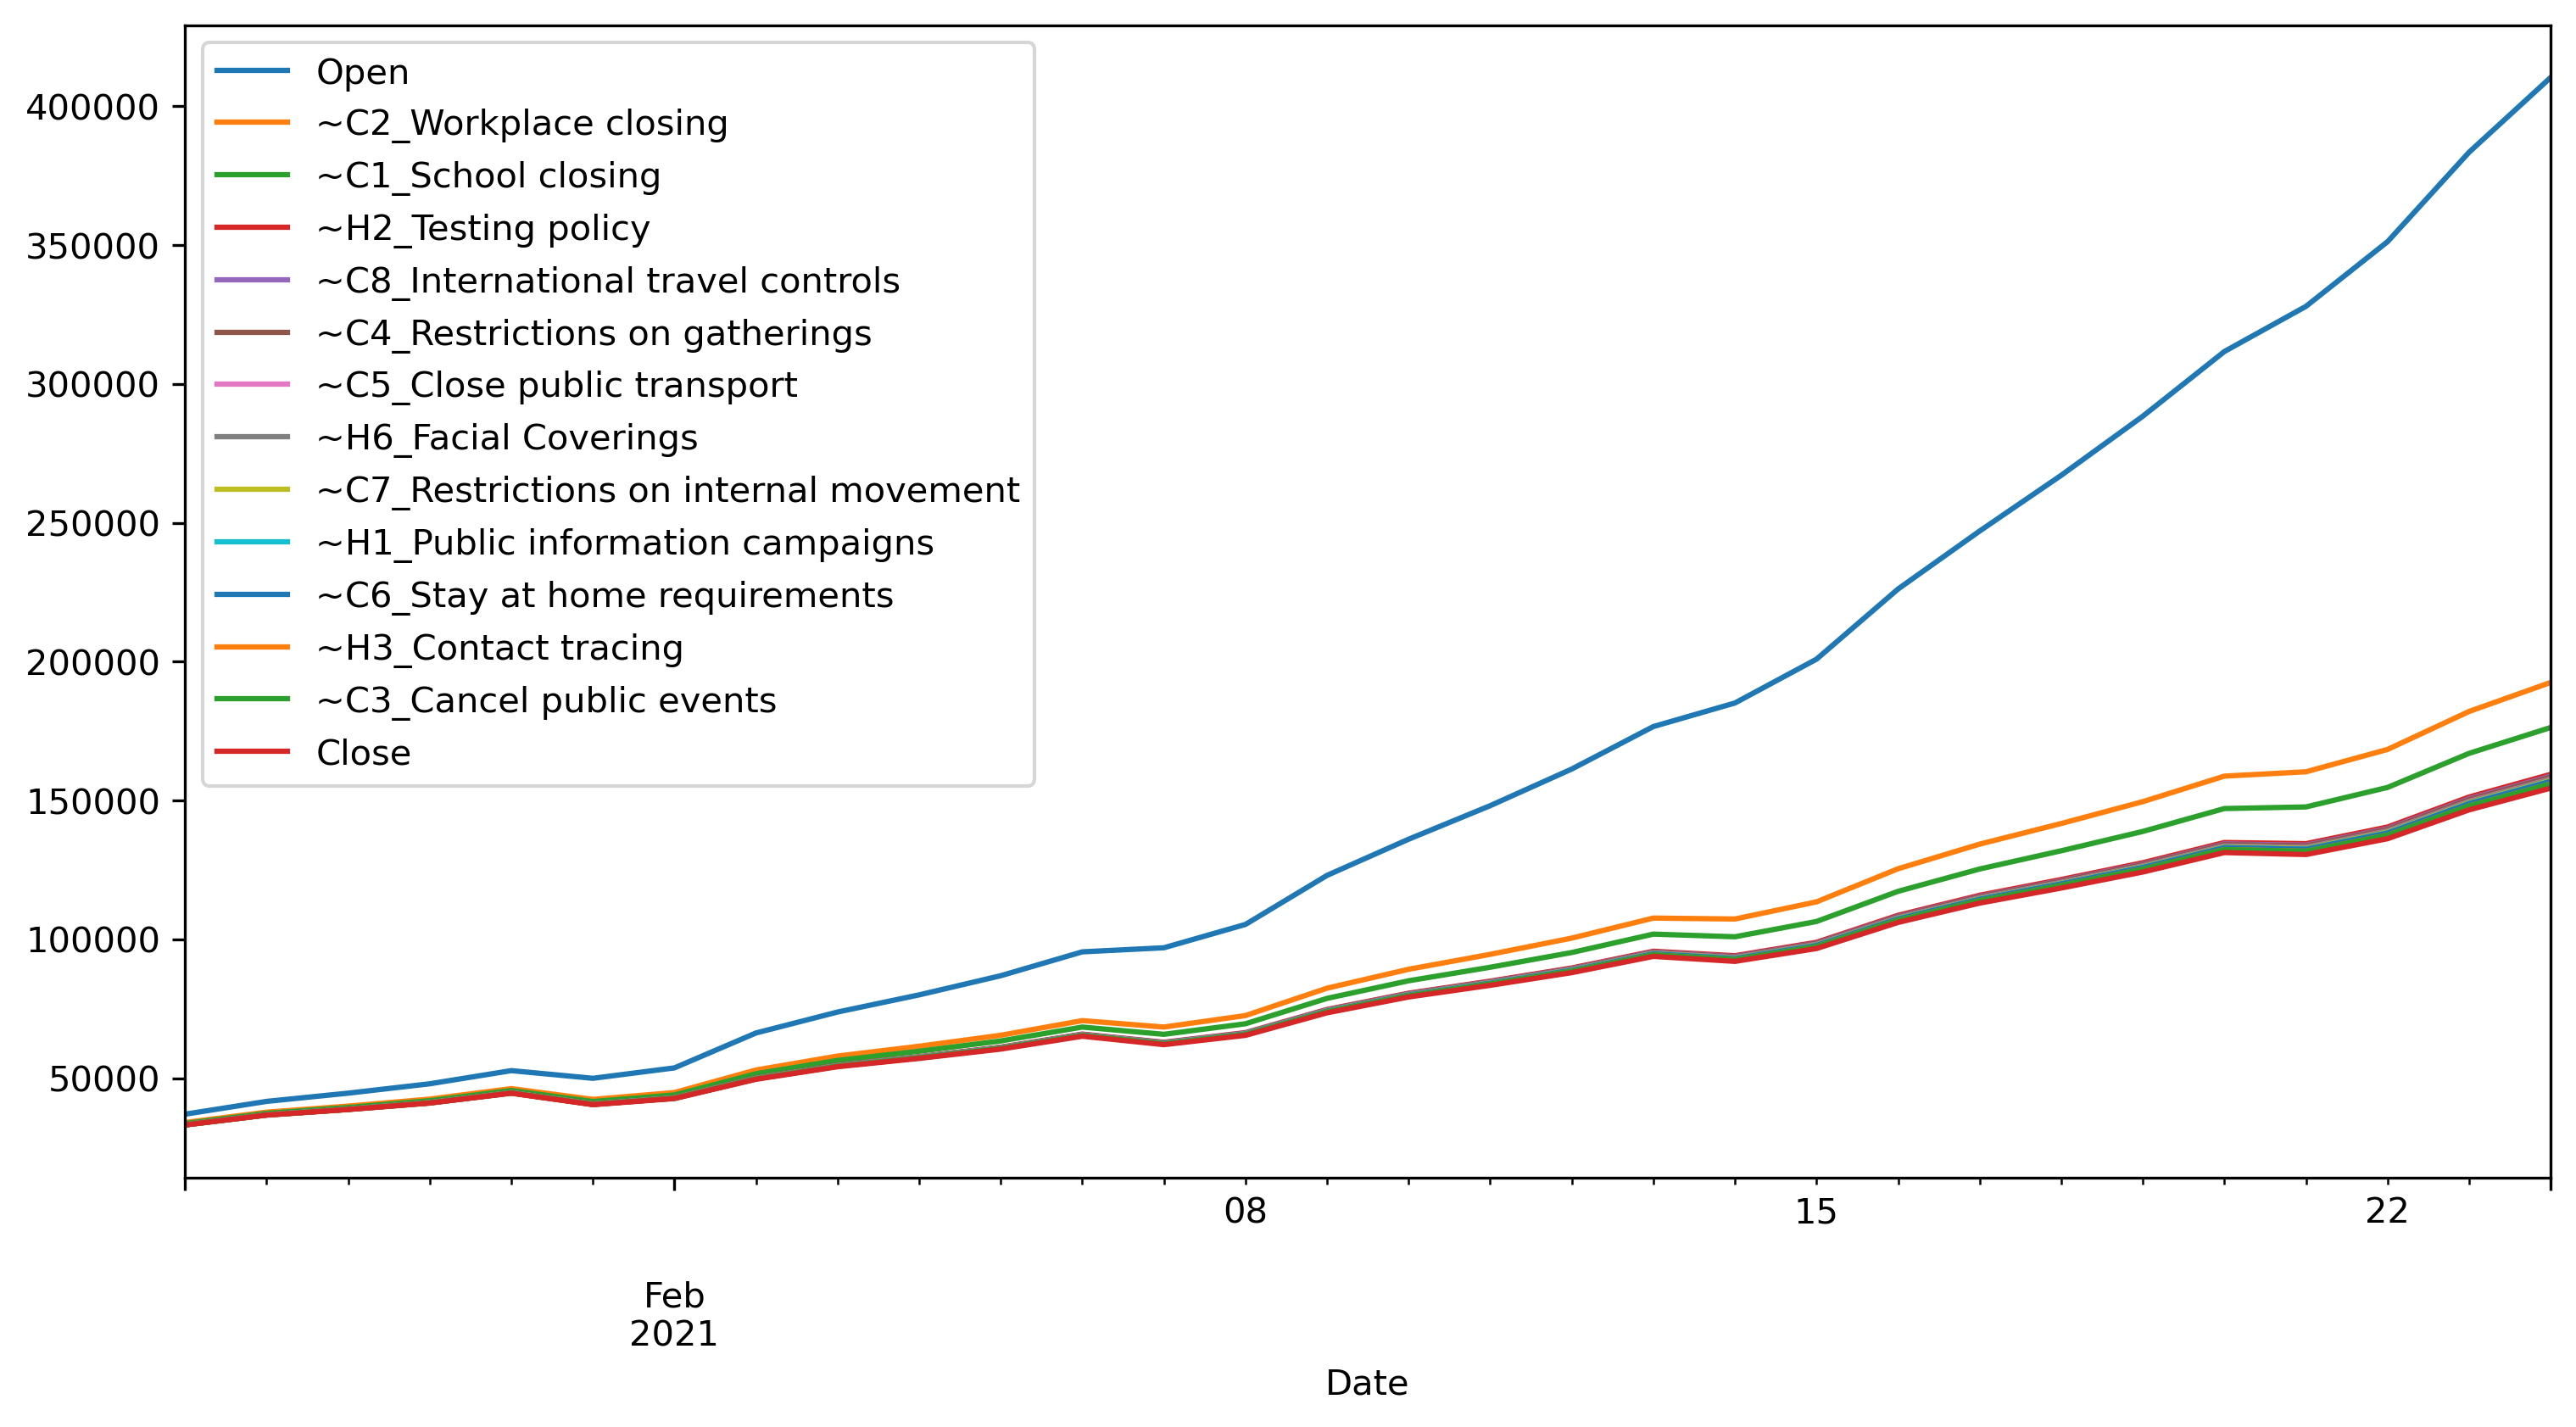

In [75]:
keys = list(IP_MAX_VALUES.keys())
keys.sort()
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
cnt = [x.Mexico.sum() for x in res2]
for _, x in sorted(zip(cnt, res2), reverse=True):
    x.Mexico.plot(ax=ax)
plt.legend([l for _, l in sorted(zip(cnt, ["Open"] + ["~" +  k for k in keys] + ["Close"]), reverse=True)])
plt.savefig("mexico2.png")